<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/Random_forest_classifier_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('/content/Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


Perform EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [7]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

Convert Sales dataset into 3 classes with labels Good, Medium and Bad.

In [9]:
data_cl = data.copy()

In [10]:
data_cl['Sales'] = pd.cut(data_cl['Sales'], bins=(0,4,10,17), labels = ('Bad','Medium','Good'))

In [11]:
data_cl 

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Good,111,48,16,260,83,Good,65,10,Yes,Yes
2,Good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Medium,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Good,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [12]:
data_cl = pd.get_dummies(data_cl, columns=['Urban','US'], drop_first = True)

In [13]:
data_cl['Sales'] = data_cl['Sales'].map({'Good':2, 'Medium':1,'Bad':0})

In [14]:
data_cl['ShelveLoc'] = data_cl['ShelveLoc'].map({'Good':2, 'Medium':1,'Bad':0})

In [15]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [16]:
data_cl = data_cl.rename({'Urban_Yes':'Urban','US_Yes':'US'},axis=1)

In [17]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [18]:
data_cl = data_cl.dropna()

In [19]:
data_cl

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,2,65,10,1,1
2,2,113,35,10,269,80,1,59,12,1,1
3,1,117,100,4,466,97,1,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,2,33,14,1,1
396,1,139,23,3,37,120,1,55,11,0,1
397,1,162,26,12,368,159,1,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


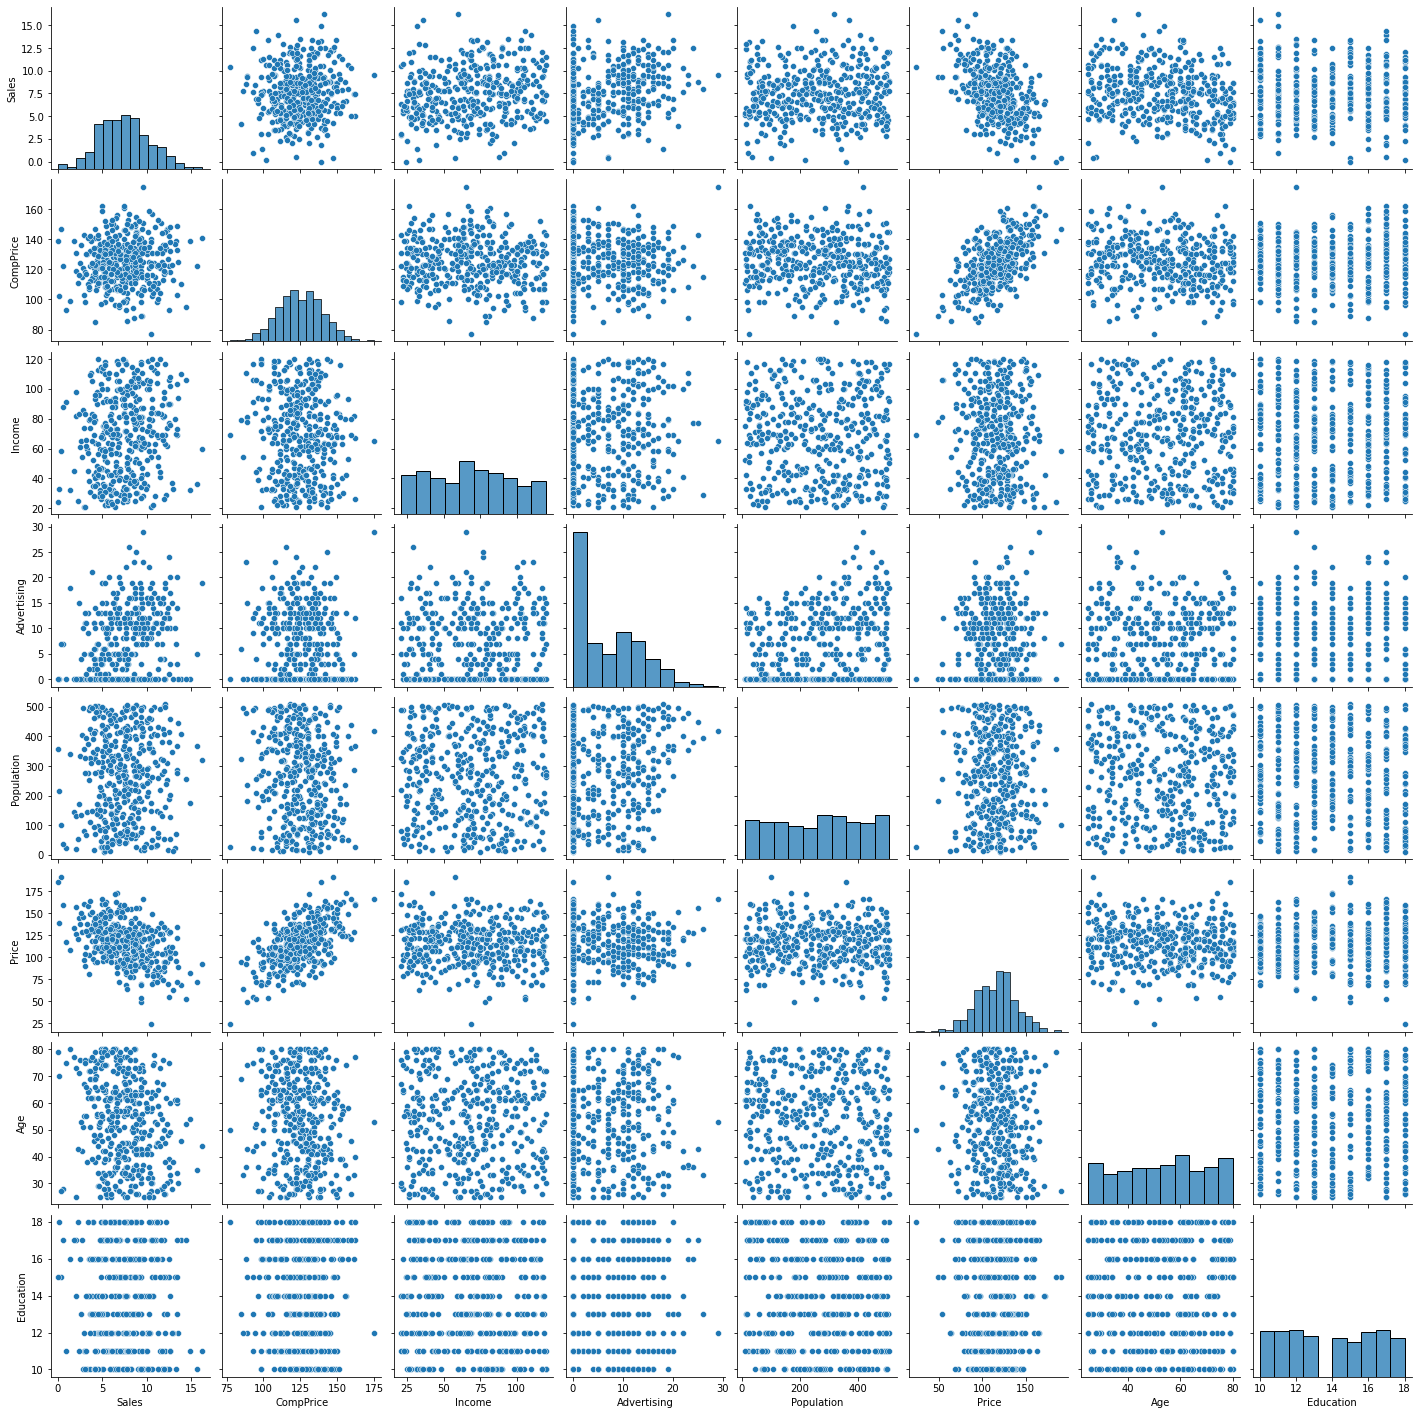

In [20]:
sns.pairplot(data)

In [21]:
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


Model building

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
seed = 30

In [24]:
x = data_cl.drop('Sales',axis=1)

In [25]:
y = data_cl['Sales']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=seed)

In [27]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
80,113,100,16,353,79,0,68,11,1,1
199,122,88,5,335,126,1,64,14,1,1
263,116,26,6,434,115,1,25,17,1,1
329,100,54,9,433,89,2,45,12,1,1
157,121,58,8,249,90,1,48,13,0,1
...,...,...,...,...,...,...,...,...,...,...
310,175,65,29,419,166,1,53,12,1,1
387,142,73,14,238,115,1,73,14,0,1
140,133,60,10,277,129,1,45,18,1,1
302,108,77,13,388,110,0,74,14,1,1


In [28]:
y_train

80     1
199    1
263    1
329    2
157    2
      ..
310    1
387    1
140    1
302    1
294    2
Name: Sales, Length: 279, dtype: category
Categories (3, int64): [0 < 1 < 2]

Hyperparameter tuning using Randomizedsearch cv


In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [35]:
model_gini = RandomForestClassifier(criterion='gini',bootstrap=True)
params_gini = {'n_estimators':range(10,201),'max_depth':range(1,15),'max_leaf_nodes':range(1,20),'max_samples':range(1,50)}
random_gini = RandomizedSearchCV(model_gini, param_distributions=params_gini,cv=6,scoring='accuracy')
random_gini.fit(x_train,y_train)

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 15),
                                        'max_leaf_nodes': range(1, 20),
                                        'max_samples': range(1, 50),
                                        'n_estimators': range(10, 201)},
                   scoring='accuracy')

In [36]:
best_gini = random_gini.best_params_

In [38]:
best_gini

{'max_depth': 11, 'max_leaf_nodes': 7, 'max_samples': 38, 'n_estimators': 106}

In [37]:
model_ent = RandomForestClassifier(criterion='entropy',bootstrap=True)
params_ent = {'n_estimators':range(10,201),'max_depth':range(1,15),'max_leaf_nodes':range(1,20),'max_samples':range(1,50)}
random_ent = RandomizedSearchCV(model_ent, param_distributions=params_ent,cv=6,scoring='accuracy')
random_ent.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

RandomizedSearchCV(cv=6, estimator=RandomForestClassifier(criterion='entropy'),
                   param_distributions={'max_depth': range(1, 15),
                                        'max_leaf_nodes': range(1, 20),
                                        'max_samples': range(1, 50),
                                        'n_estimators': range(10, 201)},
                   scoring='accuracy')

In [39]:
best_ent = random_ent.best_params_

In [52]:
print(f'random_gini best params {best_gini} and random_ent best params{best_ent}')

random_gini best params {'n_estimators': 106, 'max_samples': 38, 'max_leaf_nodes': 7, 'max_depth': 11} and random_ent best params{'n_estimators': 53, 'max_samples': 37, 'max_leaf_nodes': 8, 'max_depth': 9}


In [41]:
model_gini = RandomForestClassifier(n_estimators=106 , bootstrap=True, max_depth=11 , max_leaf_nodes=7 ,max_samples=38 ,criterion='gini')
model_ent =  RandomForestClassifier(n_estimators=53, bootstrap=True, max_depth=9 , max_leaf_nodes=8 ,max_samples=37 ,criterion='entropy')

In [42]:
model_gini.fit(x_train,y_train)
model_ent.fit(x_train,y_train)
y_pred_gin = model_gini.predict(x_test)
y_pred_ent = model_ent.predict(x_test)

In [43]:
s1 = model_gini.score(x_test,y_test)
s2 = model_ent.score(x_test,y_test)

In [51]:
print(f's1:{s1}','\n',f's2:{s2}')

s1:0.7666666666666667 
 s2:0.775


In [68]:
accu_gini = np.mean(y_test==y_pred_gin)*100
accu_ent = np.mean(y_test==y_pred_ent)*100
print(f'The accuracy of the gini criteria model is {accu_gini}%''\n' f'The accuracy of the entropy criteria model is {accu_ent}%')

The accuracy of the gini criteria model is 76.66666666666667%
The accuracy of the entropy criteria model is 77.5%


In [45]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred_gin)
cm2 = confusion_matrix(y_test,y_pred_ent)



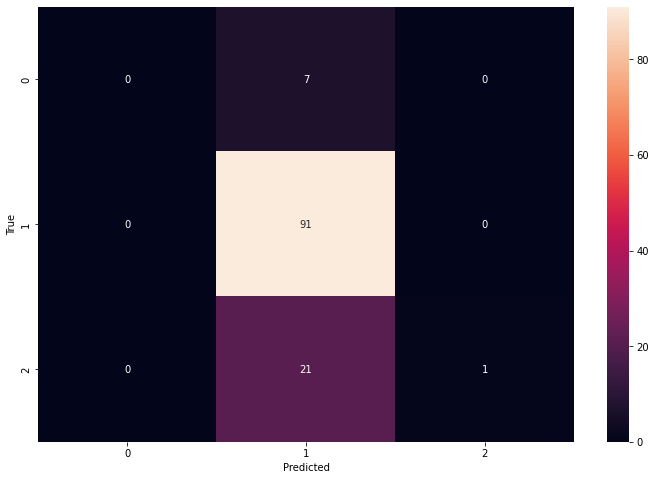

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


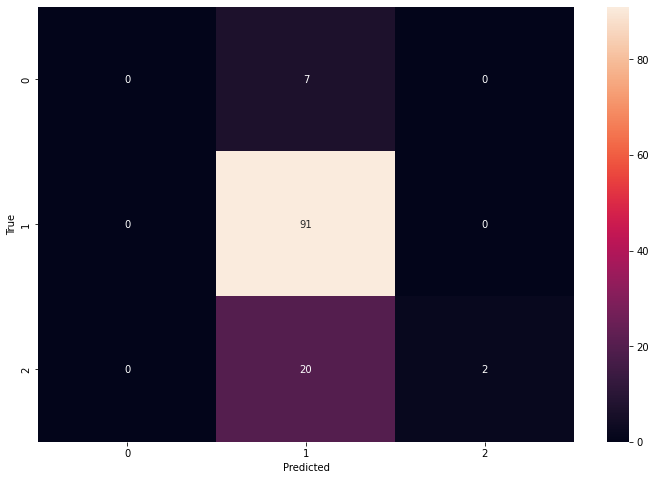

In [49]:
plt.figure(figsize=(12,8))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The model with entropy criteria has better accuracy

In [54]:
print(classification_report(y_test,y_pred_ent))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.77      1.00      0.87        91
           2       1.00      0.09      0.17        22

    accuracy                           0.78       120
   macro avg       0.59      0.36      0.35       120
weighted avg       0.77      0.78      0.69       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.tree import plot_tree, export_graphviz

[Text(0.5, 0.9, 'ShelveLoc <= 99.5\nentropy = 0.48\nsamples = 37\nvalue = [2, 34, 1]\nclass = 1'),
 Text(0.25, 0.7, 'Age <= 63.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2, 0]\nclass = 0'),
 Text(0.125, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = 1'),
 Text(0.375, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = 0'),
 Text(0.75, 0.7, 'Income <= 1.0\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]\nclass = 1'),
 Text(0.625, 0.5, 'Urban <= 0.5\nentropy = 0.503\nsamples = 9\nvalue = [0, 8, 1]\nclass = 1'),
 Text(0.5, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5, 0]\nclass = 1'),
 Text(0.75, 0.3, 'Population <= 92.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 3, 1]\nclass = 1'),
 Text(0.625, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = 2'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]\nclass = 1'),
 Text(0.875, 0.5, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24, 0]\nclass = 1')]

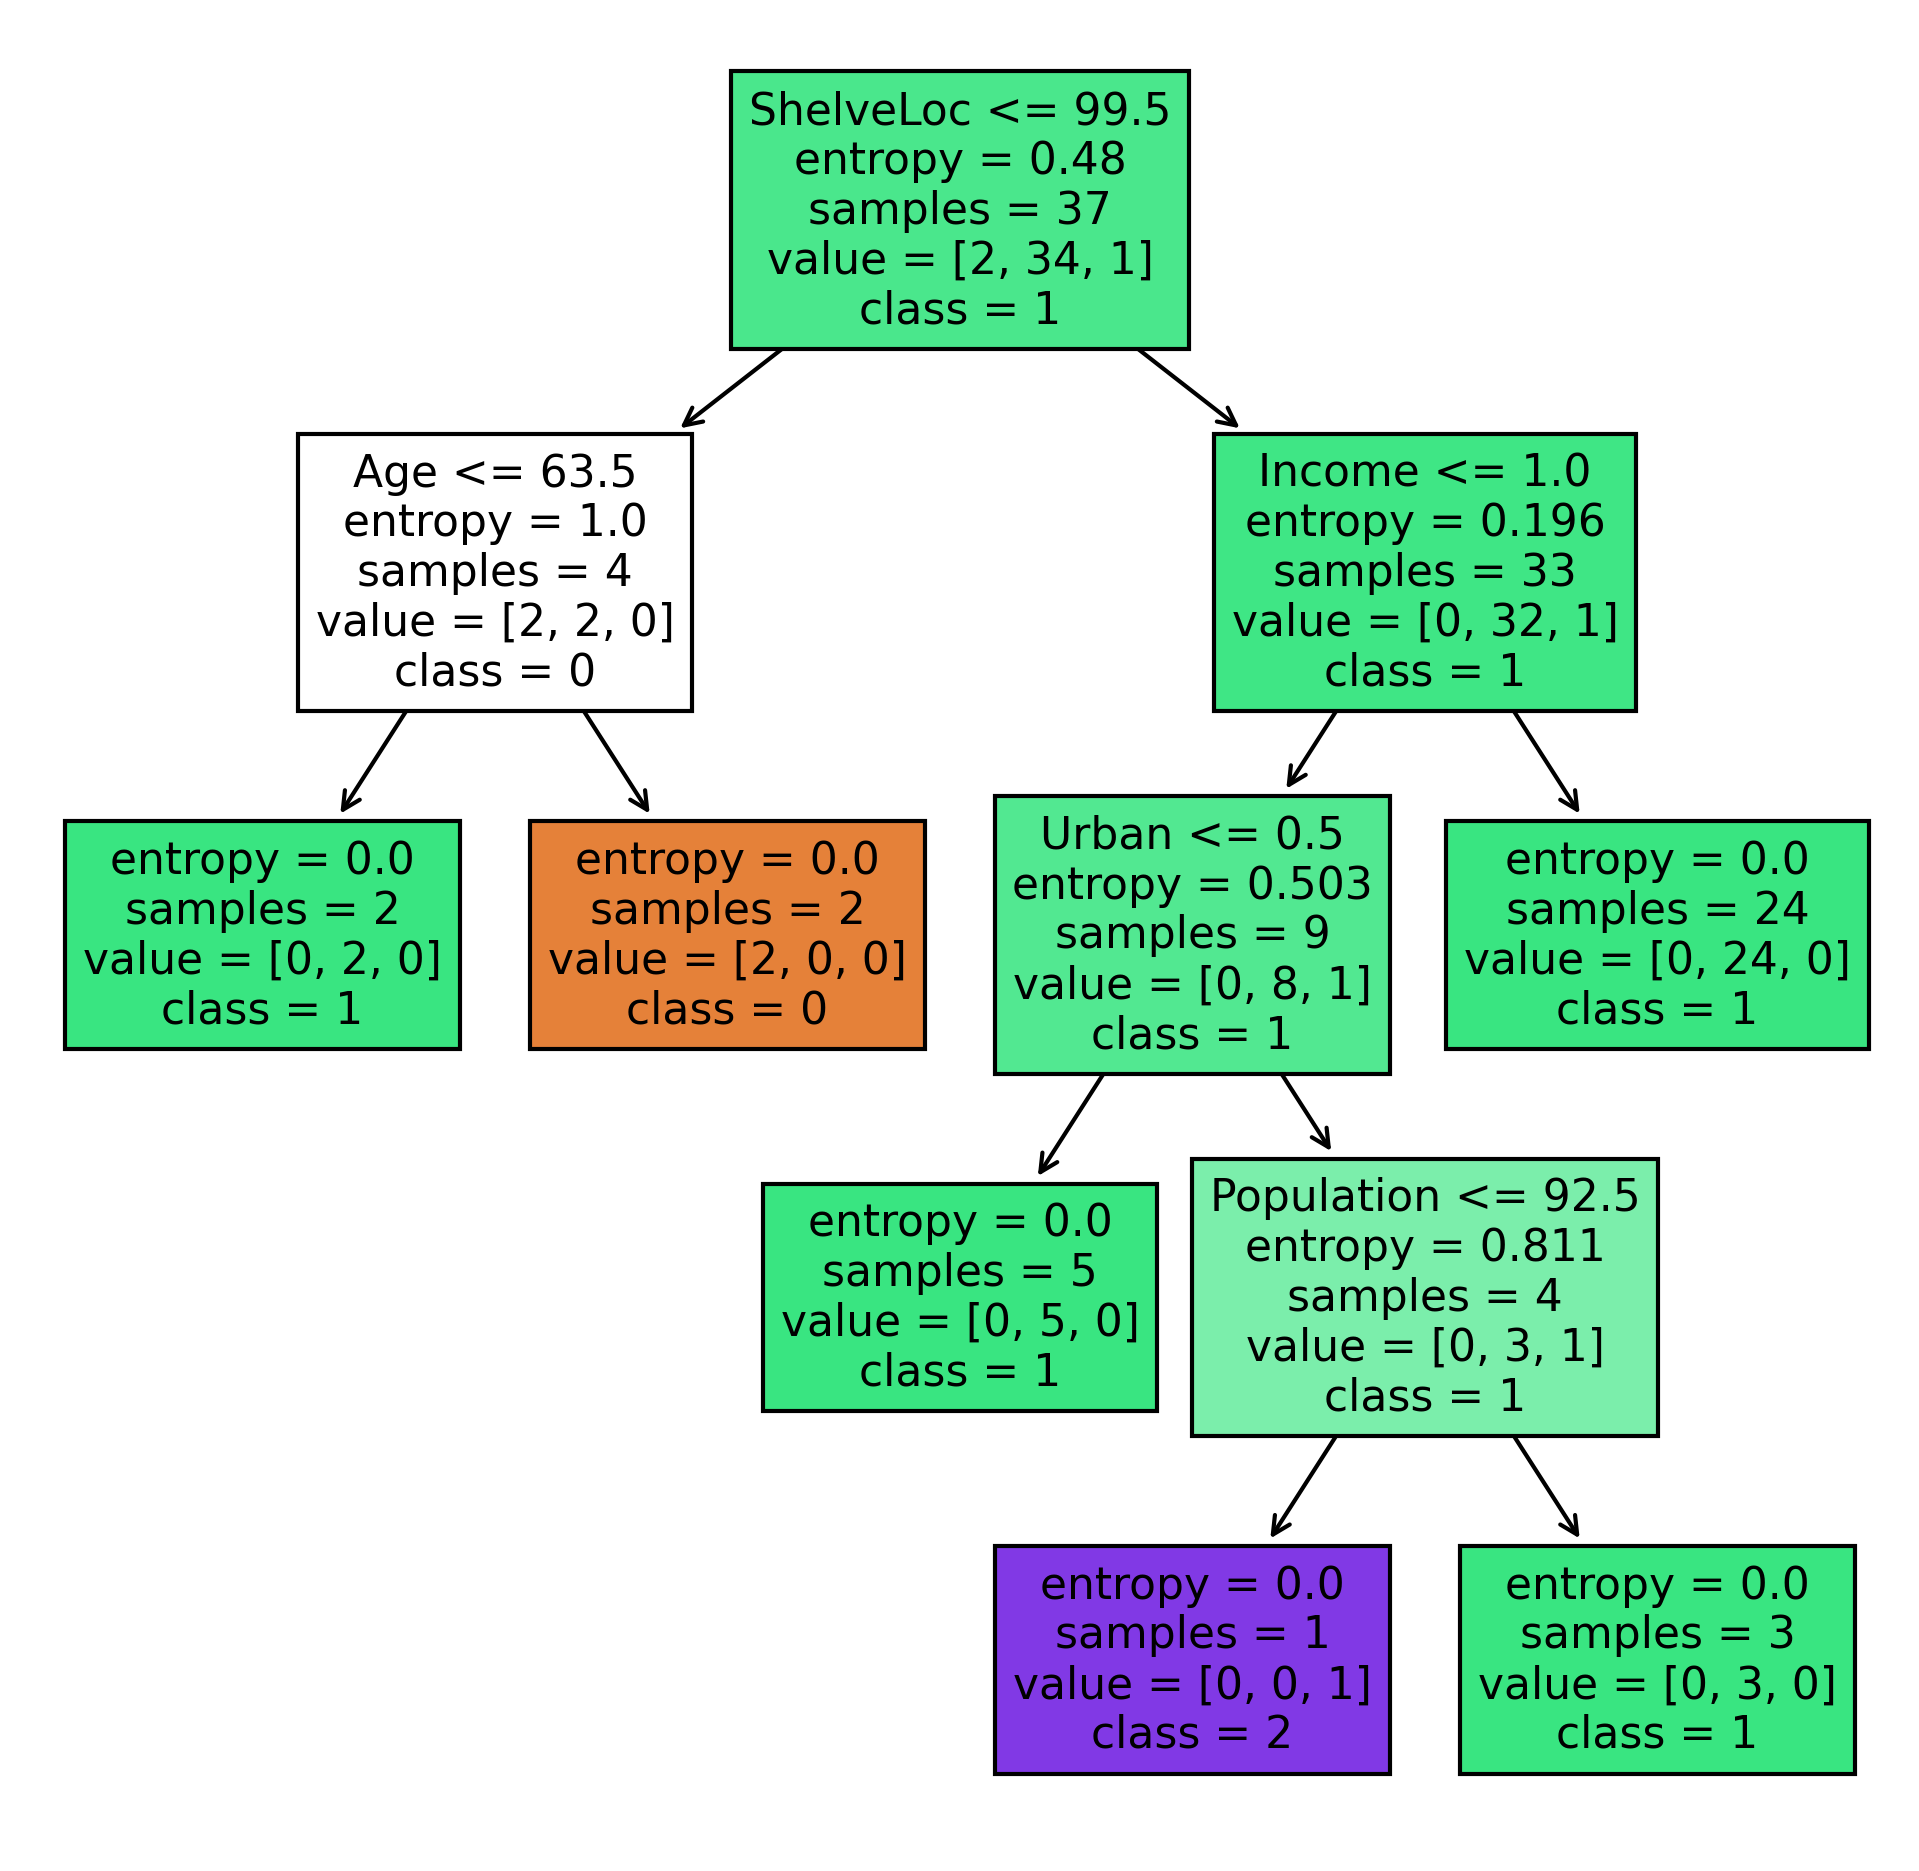

In [62]:
fn=['ShelveLoc','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']
cn=['0', '1', '2']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=300)
plot_tree(model_ent.estimators_[7],feature_names=fn,class_names=cn,filled=True)

Final entropy model

In [63]:
cross_val = cross_val_score(model_ent,x_train,y_train,cv=8,scoring='accuracy')

In [64]:
cross_val

array([0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.68571429,
       0.68571429, 0.71428571, 0.79411765])

In [65]:
mean = cross_val.mean()

In [66]:
mean

0.7171218487394958